In [76]:
import numpy as np
import matplotlib as plt
import pandas as pd
from typing import List,Tuple
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.tsa.stattools as st


# Ex1

In [3]:
def gaussian_vector(size: int, mean: float = 0.0, std: float = 1.0) -> List[float]:
    return list(np.random.normal(loc=mean, scale=std, size=size))

In [4]:
def arma_model(time_: int, alpha: List[float], betta: List[float], v_k: List[float], white_noise: List[float],
               p: int=1, q: int=1, series: List[float] = None) -> float:
    
    alpha_ = np.array(alpha[1:p + 1])
    betta_ = np.array(betta[:q])
    res = v_k[time_]
    if time_ >= q:
        eps_vector = v_k[time_ - q:time_]
        eps_vector = np.array(eps_vector[::-1])
        res += np.dot(betta_, eps_vector)
    if time_ >= p:
        x_vector = series[-p:]
        x_vector = np.array(x_vector)
        res += np.dot(alpha_, x_vector)
    if time_<q and time_<p:
        return res 
    else: return res + white_noise[time_]

In [5]:
p=3
q=3
series_len=100
alpha=np.array([0.08, 0.25, -0.25, -0.19])
betta=np.array([0.7, 0.2, 0.1])
white_noise= gaussian_vector(series_len,0,0.001)
v_k=gaussian_vector(series_len,0,1)
arma_model_ = partial(arma_model, alpha=alpha, betta=betta, v_k=v_k, white_noise=white_noise)
series = []
for i in range(series_len):
    series.append(arma_model_(time_=i, p=p, q=q, series=series))

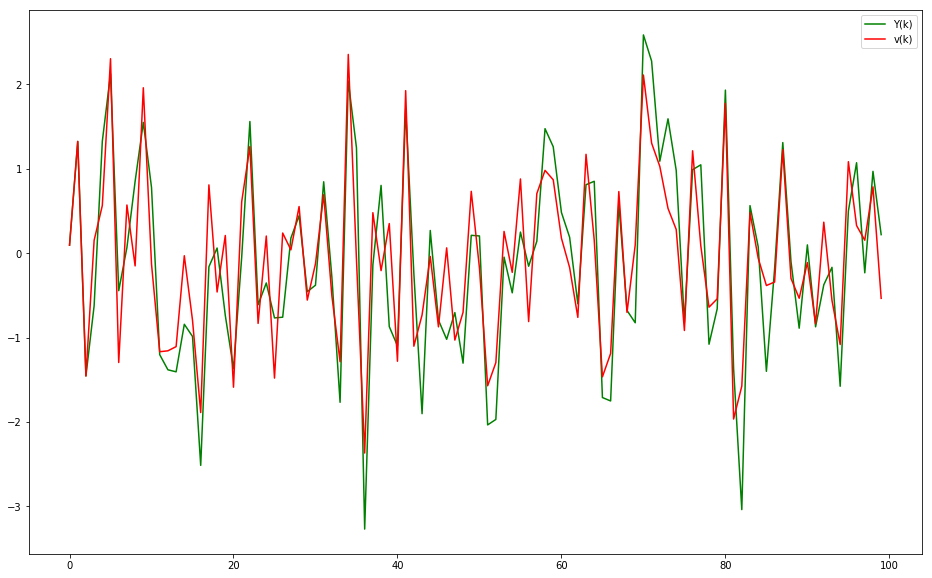

In [7]:
plt.rcParams['figure.figsize'] = (16, 10)
x=np.arange(0,100,1)
plt.plot(x, series, label='line', color='green')
plt.plot(x, v_k, label='line', color='red')
plt.legend(['Y(k)', 'v(k)'])

# Ex2.1

In [56]:
def get_variables(name) -> Tuple[List[float], List[float]]:
    with open('C:/Users/Ghost/Google Диск/7 семестр/TSA/TSA2/'+ name, 'r') as file:
        res = file.readlines()
    return np.array(list(map(float, res)))
    

In [57]:
def MA(time_: int, series: List[float], numb):
    s=0
    for i in range(numb):
        s=s+series[time_-i]
    s=s/numb
    return s

In [58]:
def EMA(time_: int, series: List[float], numb:int, w_ema:list):
    s=0
    for i in range(numb):
        s=s+series[time_-i]*w_ema[i]
    s=s/np.sum(w_ema)
    return s
    

In [59]:
def w_ema(numb):
    w=[]
    for i in range(numb):
        w.append((1-2/(numb+1))**i)
    return w

In [88]:
Y=[]
numb=10
name='RTScr.txt'
name='1997rts1.txt'
Y=get_variables(name)
x=np.arange(0, len(Y),1)
#plt.plot(x, Y, label='line', color='green')
plt.rcParams['figure.figsize'] = (16, 10)

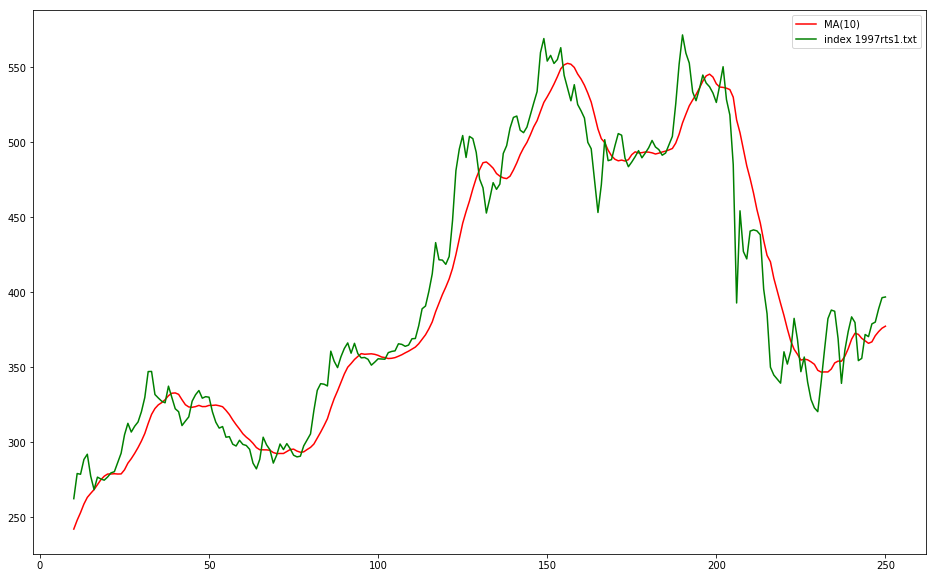

In [89]:
MA_=partial(MA, series=Y, numb=numb)
seriesMA = []
for i in range(len(Y)):
    seriesMA.append(MA_(time_=i, series=Y, numb=numb))
plt.plot(x[numb:], seriesMA[numb:], label='line', color='red')
plt.plot(x[numb:], Y[numb:], label='line', color='green')
plt.legend(['MA('+str(numb)+')', 'index '+name])

In [92]:
numb=10
w_ema_=w_ema(numb)
print(np.array(w_ema_).reshape(numb,1))
x=np.arange(0, len(Y),1)
seriesEMA = []
EMA_=partial(EMA,series=Y, numb=numb, w_ema=w_ema_)
for i in range(len(Y)):
    seriesEMA.append(EMA_(time_=i, series=Y, numb=numb, w_ema=w_ema_))


[[ 1.        ]
 [ 0.81818182]
 [ 0.66942149]
 [ 0.54770849]
 [ 0.44812513]
 [ 0.36664783]
 [ 0.29998459]
 [ 0.24544194]
 [ 0.20081613]
 [ 0.16430411]]


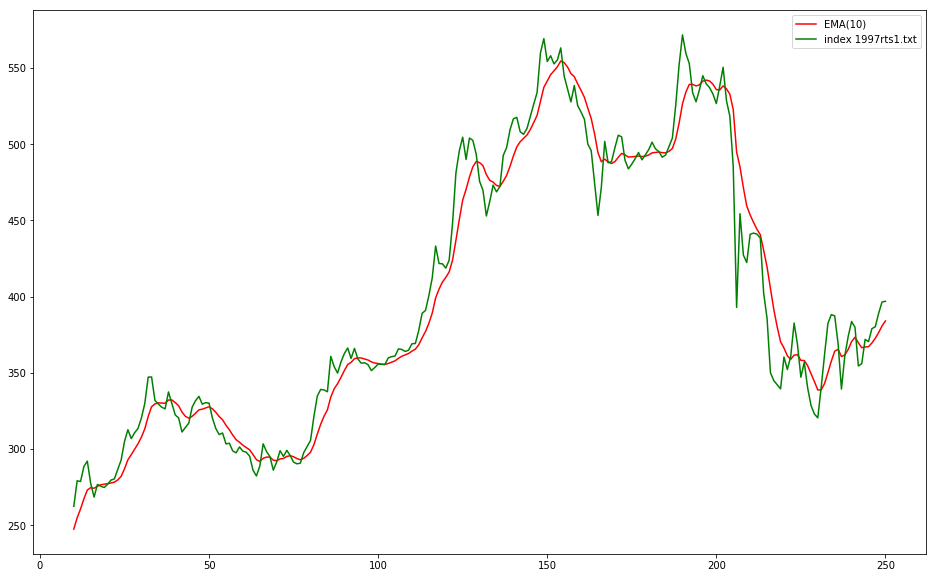

In [93]:
#plt.plot(x, seriesMA, label='line', color='green')
plt.plot(x[numb:], seriesEMA[numb:], label='line', color='red')
plt.plot(x[numb:],Y[numb:],label='line', color='green')
plt.legend(['EMA('+str(numb)+')', 'index '+name])

In [94]:
np.array(st.pacf(Y,nlags=12)).reshape(13,1)

array([[ 1.        ],
       [ 0.98660854],
       [-0.06402021],
       [-0.01155919],
       [-0.05075213],
       [ 0.18208182],
       [-0.0012508 ],
       [-0.06541041],
       [ 0.04530917],
       [-0.04595768],
       [-0.02000821],
       [-0.08904215],
       [ 0.0133251 ]])

In [99]:
import statsmodels.graphics.tsaplots as smt

Критерий Дики-Фуллера: p=0.423717


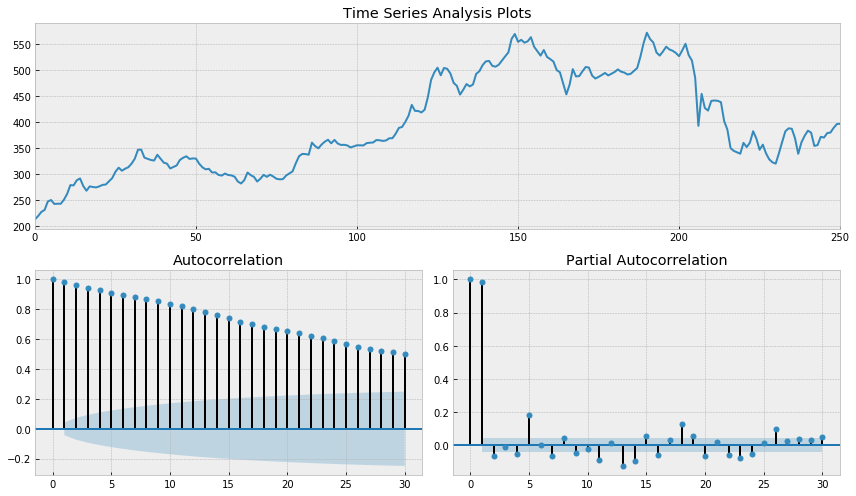

In [101]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % st.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(Y, lags=30)

In [103]:
import scipy.stats as scs

In [115]:
def invboxcox(y,lmbda):
    # обрабтное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))
dataset=pd.DataFrame(x, columns=['X'])
dataset['Y']=pd.Series(Y)
dataset

,X,Y
0,0,213.38
1,1,219.86
2,2,227.73
3,3,231.48
4,4,247.69
5,5,250.55
6,6,243.03
7,7,243.46
8,8,243.31
9,9,251.07


Критерий Дики-Фуллера: p=0.000000
Оптимальный параметр преобразования Бокса-Кокса: 0.712912


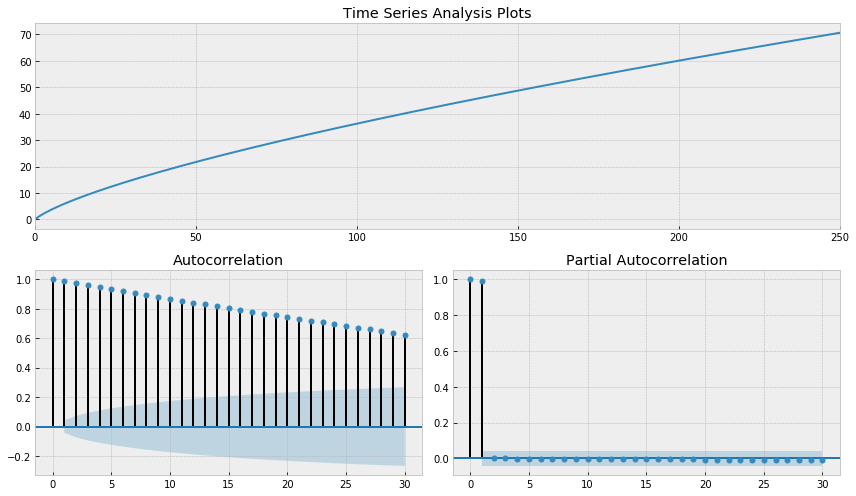

In [118]:
data = dataset.copy()
data['Users_box'], lmbda = scs.boxcox(data.X+1) # прибавляем единицу, так как в исходном ряде есть нули
tsplot(data.Users_box, lags=30)
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)

# Ex2.2

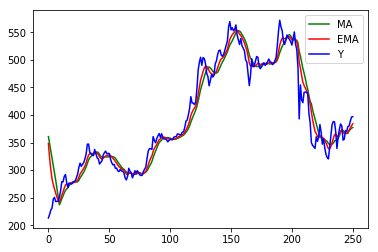

In [78]:
Y=[]
numb=10
Y=get_variables('1997rts1.txt')
x=np.arange(0, len(Y),1)
MA_=partial(MA, series=Y, numb=numb)
seriesMA = []
for i in range(len(Y)):
    seriesMA.append(MA_(time_=i, series=Y, numb=numb))
w_ema_=w_ema(numb)
x=np.arange(0, len(Y),1)
seriesEMA = []
EMA_=partial(EMA,series=Y, numb=numb, w_ema=w_ema_)
for i in range(len(Y)):
    seriesEMA.append(EMA_(time_=i, series=Y, numb=numb, w_ema=w_ema_))
plt.plot(x, seriesMA, label='line', color='green')
plt.plot(x, seriesEMA, label='line', color='red')
plt.plot(x,Y,label='line', color='blue')
plt.legend(['MA', 'EMA', 'Y'])